In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from textwrap import wrap
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.exceptions import DataConversionWarning
import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

# Impact of different regularization norms

In [3]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv('test.csv')

In [4]:
X_all_train = train_df.loc[:, train_df.columns != 'categories']
y_all_train = train_df.loc[:, train_df.columns == 'categories']

In [5]:
y_all_train = y_all_train.categories

In [6]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_all_train)

# Apply transform to both the training set and the test set.
train_std = scaler.transform(X_all_train)


In [24]:
pca = PCA(n_components=10)
pca.fit(train_std)
X_pca = pca.transform(train_std)

C=1.00
Sparsity with L1 penalty: 0.83%
score with L1 penalty: 0.9744
Sparsity with L2 penalty: 0.00%
score with L2 penalty: 0.9726
TEST (120,)

C=0.10
Sparsity with L1 penalty: 3.33%
score with L1 penalty: 0.9732
Sparsity with L2 penalty: 0.00%
score with L2 penalty: 0.9721
TEST (120,)

C=0.01
Sparsity with L1 penalty: 42.50%
score with L1 penalty: 0.9691
Sparsity with L2 penalty: 0.00%
score with L2 penalty: 0.9719
TEST (120,)



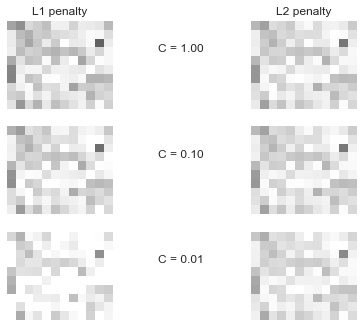

In [33]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_l1_l2_sparsity.html#sphx-glr-auto-examples-linear-model-plot-logistic-l1-l2-sparsity-py
X = X_pca
y = y_all_train

# Set regularization parameter
for i, C in enumerate((1, 0.1, 0.01)):
    # turn down tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, penalty='l1', tol=0.01, solver='saga', multi_class='multinomial')
    clf_l2_LR = LogisticRegression(C=C, penalty='l2', tol=0.01, solver='saga', multi_class='multinomial')
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100

    print("C=%.2f" % C)
    print("Sparsity with L1 penalty: %.2f%%" % sparsity_l1_LR)
    print("score with L1 penalty: %.4f" % clf_l1_LR.score(X, y))
    print("Sparsity with L2 penalty: %.2f%%" % sparsity_l2_LR)
    print("score with L2 penalty: %.4f" % clf_l2_LR.score(X, y))

    l1_plot = plt.subplot(3, 2, 2 * i + 1)
    l2_plot = plt.subplot(3, 2, 2 * (i + 1))
    if i == 0:
        l1_plot.set_title("L1 penalty")
        l2_plot.set_title("L2 penalty")
    print('TEST',coef_l1_LR.shape)
    print()
    l1_plot.imshow(np.abs(coef_l1_LR.reshape(10, 12)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
    l2_plot.imshow(np.abs(coef_l2_LR.reshape(10, 12)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
    plt.text(-11, 3, "C = %.2f" % C)

    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    
plt.savefig('l1_vs_l2_log_reg_impact.png')
plt.show()